Problem Statement:
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import datasets


In [2]:
file = 'C:\\Users\\praja\\Downloads\\Flight_Ticket_Participant_Datasets-20190305T100527Z-001\\Flight_Ticket_Participant_Datasets\\Data_Train.xlsx'
train_df = pd.read_excel(file)
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
train_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [4]:
# Information of dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
train_df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [6]:
# Checked for null value
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
# Dropping Null values
train_df.dropna(inplace=True)

In [8]:
# Duplicate Values in dataset
train_df[train_df.duplicated()].head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303


In [9]:
# Dropping duplicates
train_df.drop_duplicates(keep = 'first', inplace = True)

In [10]:
train_df.shape

(10462, 11)

In [11]:
#Counts of unique value in Airlines
train_df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [12]:
train_df['Airline'].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [13]:
train_df['Additional_Info'].value_counts()

No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [14]:
# Different routes
train_df['Route'].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

In [15]:
# Lets read test data
file1 = 'C:\\Users\\praja\\Downloads\\Flight_Ticket_Participant_Datasets-20190305T100527Z-001\\Flight_Ticket_Participant_Datasets\Test_set.xlsx'
test_df = pd.read_excel(file1)
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [16]:
# Test data columns
test_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [17]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [18]:
test_df.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


In [19]:
test_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

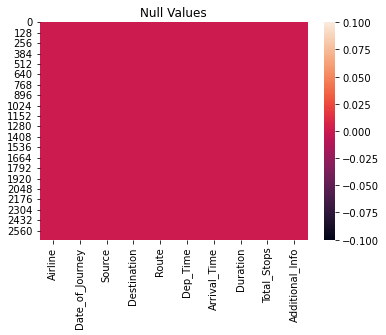

In [20]:
sns.heatmap(test_df.isnull())
plt.title('Null Values')
plt.show()

There are no null values in dataset

# Data Visualization

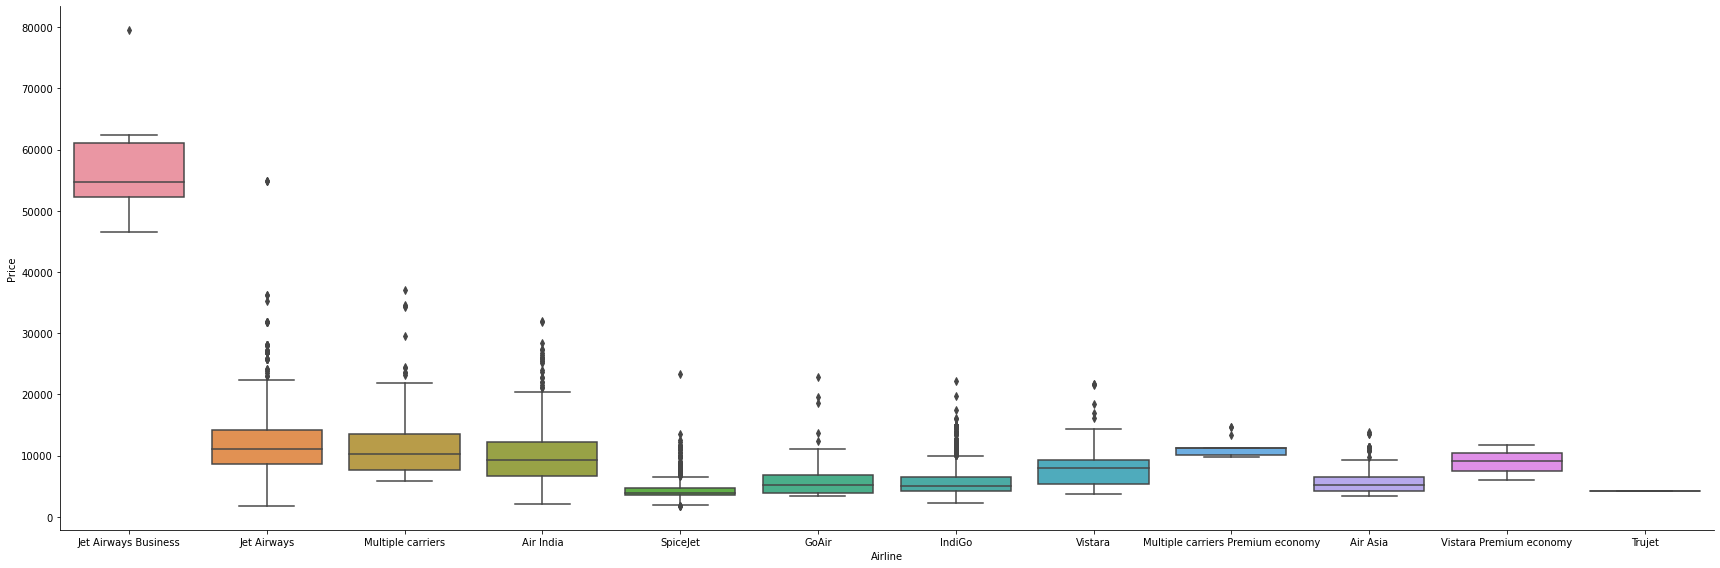

In [21]:
#Plotting Price vs Airlines
sns.catplot(y = "Price", x = "Airline", data = train_df.sort_values('Price',ascending = False), kind = 'box', height = 8, aspect = 3)
plt.show()

As per boxplot between the Price and Airline, conslusion is that Jet Airways has the most ouliers for Price.

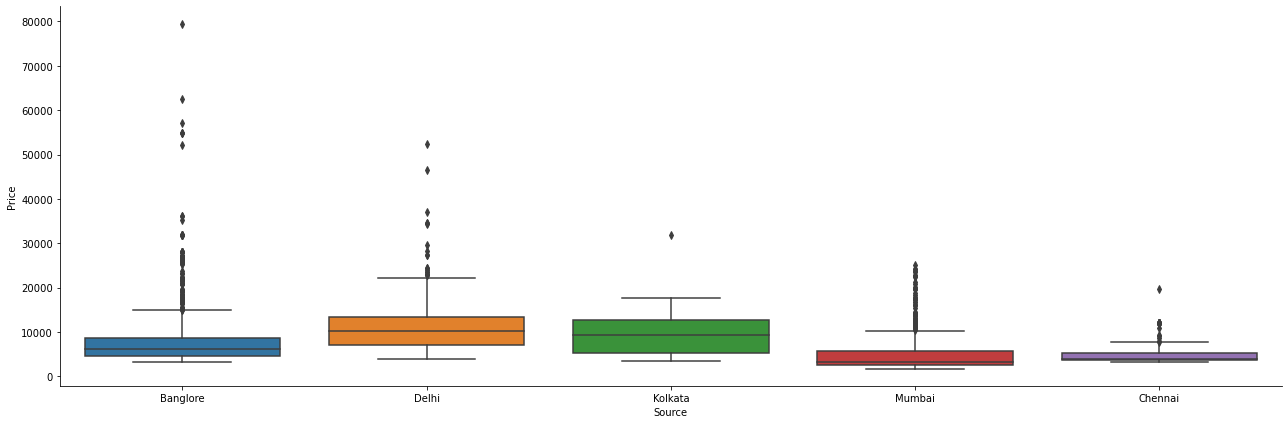

In [22]:
# Plotting Price Vs Source
sns.catplot(y = 'Price', x = 'Source', data = train_df.sort_values('Price', ascending = False), kind = 'box', height = 6, aspect = 3)
plt.show()

As per this boxplot between Price and Source, conclusion is that Banglore source location has most outliers and Chennai has less

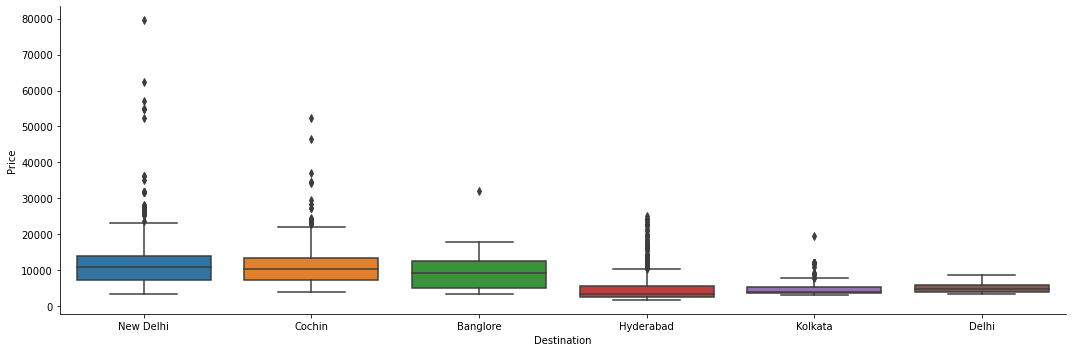

In [23]:
# Plotting Price vs Destination
sns.catplot(y = 'Price', x = 'Destination', data = train_df.sort_values('Price', ascending = False), kind = 'box', height = 5, aspect = 3)
plt.show()

As per boxplot between Price and Destination, conclusion is that New Delhi has most outilers while kolkata has less

In [24]:
# lets see processed data
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [25]:
# Dividing data into features and Labels and will converting Hours in minutes.
train_df['Duration'] = train_df['Duration'].str.replace("h", "*60").str.replace('','+').str.replace('m', '*1')
test_df['Duration'] = test_df['Duration'].str.replace("h", '*60').str.replace('','+').str.replace('m', '*1')

In [26]:
# Date of Journey
train_df['Journey_day'] = train_df['Date_of_Journey'].str.split('/').str[0].astype(int)
train_df['Journey_month'] = train_df['Date_of_Journey'].str.split('/').str[1].astype(int)
train_df.drop(['Date_of_Journey'], axis = 1, inplace = True)

In [27]:
# Converting Departure time into hours and minutes
train_df['Dep_hour'] = pd.to_datetime(train_df['Dep_Time']).dt.hour
train_df['Dep_min'] = pd.to_datetime(train_df['Dep_Time']).dt.minute
train_df.drop(['Dep_Time'], axis = 1, inplace = True)

In [28]:
# Converting Arrival time into hours and minutes
train_df['Arrival_hour'] = pd.to_datetime(train_df.Arrival_Time).dt.hour
train_df['Arrival_min'] = pd.to_datetime(train_df.Arrival_Time).dt.minute
train_df.drop(['Arrival_Time'], axis = 1, inplace = True)

In [29]:
# After preprocessing lets check dataset
train_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,+2+*+6+0+ +5+0+*1+,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,+7+*+6+0+ +2+5+*1+,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,+1+9+*+6+0+,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,+5+*+6+0+ +2+5+*1+,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,+4+*+6+0+ +4+5+*1+,1 stop,No info,13302,1,3,16,50,21,35


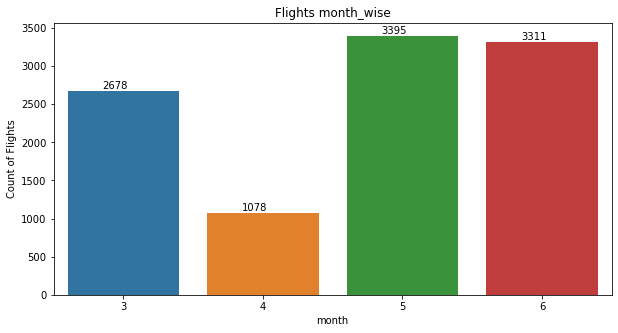

In [30]:
#Plotting Chart for Months vs Number of Flights
plt.figure(figsize = (10,5))
plt.title('Flights month_wise')
ax = sns.countplot(x = 'Journey_month', data = train_df)
plt.xlabel('month')
plt.ylabel('Count of Flights')
for i in ax.patches:
    ax.annotate(int(i.get_height()), (i.get_x()+0.25, i.get_height()+1), va='bottom', color = 'black')

The chart plotted above for Months vs Number of Flights shows that May month has more number of flights

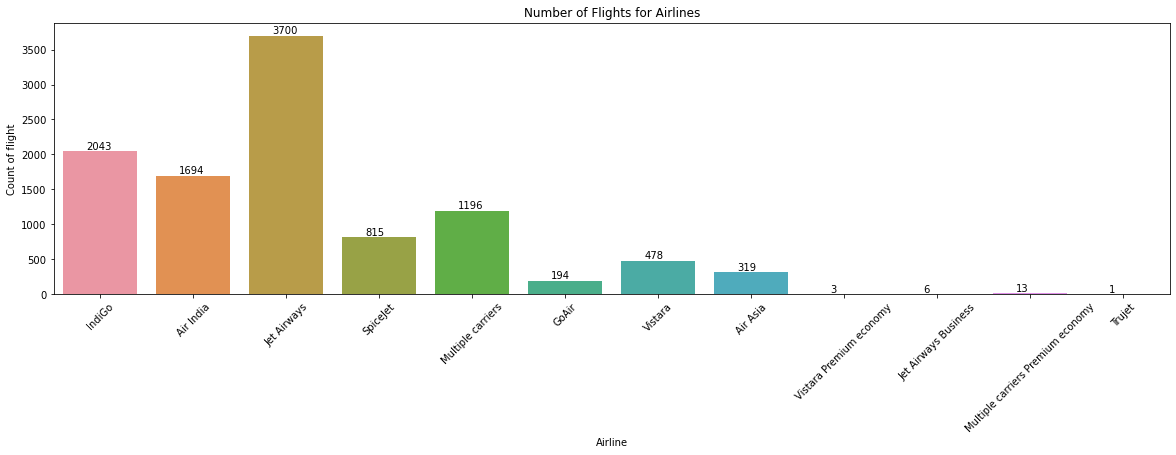

In [31]:
# Plotting Chart for Type of Airline vs Number of Flights
plt.figure(figsize = (20,5))
plt.title('Number of Flights for Airlines')
ax = sns.countplot(x = 'Airline', data = train_df)
plt.xlabel('Airline')
plt.ylabel('Count of flight')

plt.xticks(rotation = 45)
for i in ax.patches:
    ax.annotate(int(i.get_height()), (i.get_x()+0.25, i.get_height()+1), va = 'bottom', color = 'black')

The chart plotted above for Airline and Count of flights shows that Jet Airways has most number of flights

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

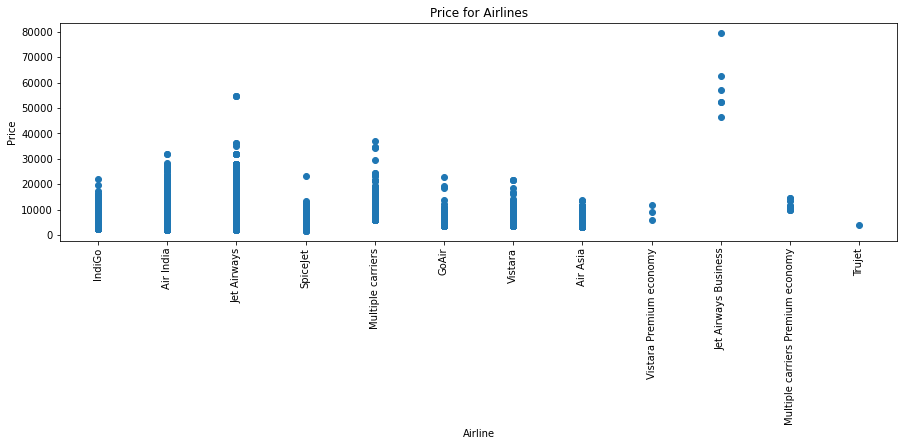

In [32]:
# Plotting Price vs Airline
plt.figure(figsize= (15,4))
plt.title('Price for Airlines')
plt.scatter(train_df['Airline'], train_df['Price'])
plt.xticks
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation = 90)

# Correlation 

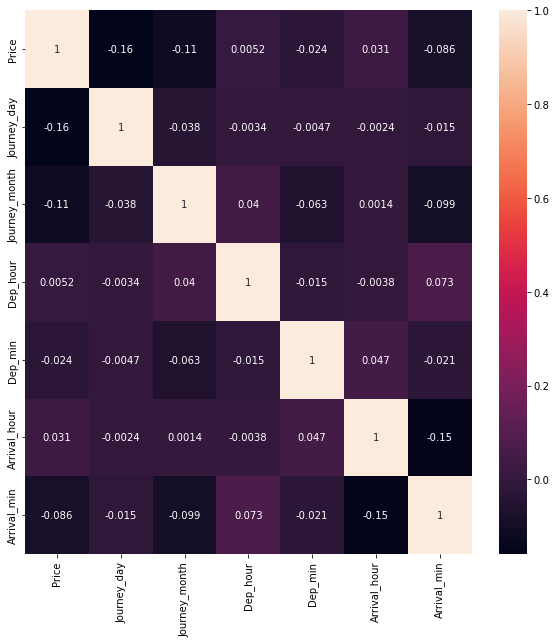

In [33]:
# Plotting Correlation
plt.figure(figsize =(10,10))
sns.heatmap(train_df.corr(), annot = True)
plt.show()

In [34]:
# Dropping Price Column 
train = train_df.drop(['Price'], axis = 1)

Categorical data and Numerical data

In [35]:
train_categorical_data = train.select_dtypes(exclude = ['int64','float','int32'])
train_numerical_data = train.select_dtypes(include = ['int64','float','int32'])
test_categorical_data = test_df.select_dtypes(exclude = ['int64','float','int32'])
test_numerical_data = test_df.select_dtypes(include = ['int64','float','int32'])
train_categorical_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,+2+*+6+0+ +5+0+*1+,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,+7+*+6+0+ +2+5+*1+,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,+1+9+*+6+0+,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,+5+*+6+0+ +2+5+*1+,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,+4+*+6+0+ +4+5+*1+,1 stop,No info


In [36]:
# Label Encode for categorical data
lab = LabelEncoder()
train_categorical_data = train_categorical_data.apply(LabelEncoder().fit_transform)
test_categocrical_data = test_categorical_data.apply(LabelEncoder().fit_transform)
train_categorical_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info
0,3,0,5,18,130,4,8
1,1,3,0,84,336,1,8
2,4,2,1,118,111,1,8
3,3,3,0,91,311,0,8
4,3,0,5,29,297,0,8


In [37]:
#Concatenating Categorical data and Numerical data
x = pd.concat([train_categorical_data, train_numerical_data], axis=1)
y = train_df['Price']
test_set = pd.concat([test_categorical_data, test_numerical_data], axis=1)
x.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,3,0,5,18,130,4,8,24,3,22,20,1,10
1,1,3,0,84,336,1,8,1,5,5,50,13,15
2,4,2,1,118,111,1,8,9,6,9,25,4,25
3,3,3,0,91,311,0,8,12,5,18,5,23,30
4,3,0,5,29,297,0,8,1,3,16,50,21,35


In [38]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

Splitting out dataset

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [40]:
print('The size of training input is', x_train.shape)
print('The size of training output is', y_train.shape)
print('The size of testing input is', x_test.shape)
print('The size of testing output is', y_test.shape)

The size of training input is (7323, 13)
The size of training output is (7323,)
The size of testing input is (3139, 13)
The size of testing output is (3139,)


Model Building

Ridge Regression

In [41]:
params = {'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
ridge_regressor = GridSearchCV(Ridge(), params, cv = 5, scoring = 'neg_mean_absolute_error', n_jobs = -1)
ridge_regressor.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             scoring='neg_mean_absolute_error')

In [42]:
# predicting train and test results
y_train_pred = ridge_regressor.predict(x_train)
y_test_pred = ridge_regressor.predict(x_test)

In [43]:
print('Train Results for Ridge Regressor Model:')
print('Root Mean Squared Error:', sqrt (mse(y_train.values, y_train_pred)))
print('Mean Absolute % Error:', round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print('R-squared:', r2_score(y_train.values, y_train_pred))

Train Results for Ridge Regressor Model:
Root Mean Squared Error: 3674.016578163231
Mean Absolute % Error: 0
R-squared: 0.3765180156342428


Laso Regression

In [44]:
params = {'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
lasso_regressor = GridSearchCV(Lasso(), params, cv = 15, scoring = 'neg_mean_absolute_error', n_jobs = -1)
lasso_regressor.fit(x_train, y_train)

GridSearchCV(cv=15, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             scoring='neg_mean_absolute_error')

In [45]:
# predicting train and test results
y_train_pred = lasso_regressor.predict(x_train)
y_test_pred = lasso_regressor.predict(x_test)

In [46]:
print('Train Results for Lasso Regressor Model:')
print('Root Mean Squared Error:', sqrt (mse(y_train.values, y_train_pred)))
print('Mean Absolute % Error:', round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print('R-squared:', r2_score(y_train.values, y_train_pred))

Train Results for Lasso Regressor Model:
Root Mean Squared Error: 3674.0594853653015
Mean Absolute % Error: 0
R-squared: 0.3765034528128004


In [47]:
print('Test Results for Lasso Regressor Model:')
print('Root Mean Squared Error:', sqrt(mse(y_test, y_test_pred)))
print('Mean Absolute % Error:', round(mean_absolute_percentage_error(y_test, y_test_pred)))
print('R-Squared:',r2_score(y_test, y_test_pred))

Test Results for Lasso Regressor Model:
Root Mean Squared Error: 3582.9825084834483
Mean Absolute % Error: 0
R-Squared: 0.3818663798440135


Decision Tree Regression

In [48]:
depth = list(range(3,30))
param_grid = dict(max_depth= depth)
tree = GridSearchCV(DecisionTreeRegressor(),param_grid, cv =10)
tree.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                       25, 26, 27, 28, 29]})

In [49]:
# predicting train and test results
y_train_pred = tree.predict(x_train)
y_test_pred = tree.predict(x_test)

In [50]:
print('Train Results for Lasso Regressor Model:')
print('Root Mean Squared Error:', sqrt (mse(y_train.values, y_train_pred)))
print('Mean Absolute % Error:', round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print('R-squared:', r2_score(y_train.values, y_train_pred))

Train Results for Lasso Regressor Model:
Root Mean Squared Error: 648.1918147418214
Mean Absolute % Error: 0
R-squared: 0.9805934305510837


In [51]:
ridge_score = round(ridge_regressor.score(x_train, y_train)*100,2)
ridge_score_test = round(ridge_regressor.score(x_test, y_test)*100,2)

lasso_score = round(lasso_regressor.score(x_train, y_train)*100,2)
lasso_score_test = round(lasso_regressor.score(x_test, y_test)*100,2)

decision_score = round(tree.score(x_train, y_train)*100,2)
decision_score_test = round(tree.score(x_test, y_test)*100,2)

Comparing all the models

In [52]:
models = pd.DataFrame({'Models':['Ridge Regression', 'Lasso Regression', 'Decision Tree Regressor'],
                       'Score': [ridge_score,lasso_score,decision_score],
                       'Test Score': [ridge_score_test, lasso_score_test, decision_score_test]})
models.sort_values(by= 'Test Score', ascending = False)

,Models,Score,Test Score
2,Decision Tree Regressor,98.06,85.41
1,Lasso Regression,-264521.89,-261177.50
0,Ridge Regression,-264553.91,-261238.56


Comparing all models its concluded that Decision Tree Regressor and Random Forest Regressor perform best